# Unicorn Companies SQL Project

![Hand with calculator](calculator.jpg)

Did you know that the average return from investing in stocks is [10% per year](https://www.nerdwallet.com/article/investing/average-stock-market-return) (not accounting for inflation)? But who wants to be average?! 

You have been asked to support an investment firm by analyzing trends in high-growth companies in **the United States between the years 2019-2021**. Specifically, which industries have the highest average funding, valuation etc. Providing them with this information gives them a competitive insight as to industry trends and how they should structure their portfolio looking forward.

You have been given access to their `unicorns` database, which contains the following tables:

## dates
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `date_joined` | The date that the company became a unicorn.  |
| `year_founded` | The year that the company was founded.       |

## funding
| Column           | Description                                  |
|----------------- |--------------------------------------------- |
| `company_id`       | A unique ID for the company.                 |
| `valuation`        | Company value in US dollars.                 |
| `funding`          | The amount of funding raised in US dollars.  |
| `select_investors` | A list of key investors in the company.      |

## industries
| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `company_id`   | A unique ID for the company.                 |
| `industry`     | The industry that the company operates in.   |

## companies
| Column       | Description                                       |
|------------- |-------------------------------------------------- |
| `company_id`   | A unique ID for the company.                      |
| `company`      | The name of the company.                          |
| `city`         | The city where the company is headquartered.      |
| `country`      | The country where the company is headquartered.   |
| `continent`    | The continent where the company is headquartered. |


**Focus Questions:**
1. Which city had the most number of unicorn companies?
2. Which industries had the most number of unicorn companies?
3. Which industries had the highest average funding?
4. Which industries had the highest average valuation?

## City with most Unicorns

In [3]:
SELECT c.city, COUNT(c.*) AS num_unicorn
FROM companies c
JOIN dates AS d
    ON c.company_id = d.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
AND c.country = 'United States'
GROUP BY c.city
ORDER BY num_unicorn DESC
LIMIT 10;

,city,num_unicorn
0,San Francisco,114
1,New York,78
2,Chicago,12
3,Mountain View,10
4,Boston,10
5,Palo Alto,9
6,San Mateo,9
7,Redwood City,7
8,Los Angeles,7
9,Seattle,7


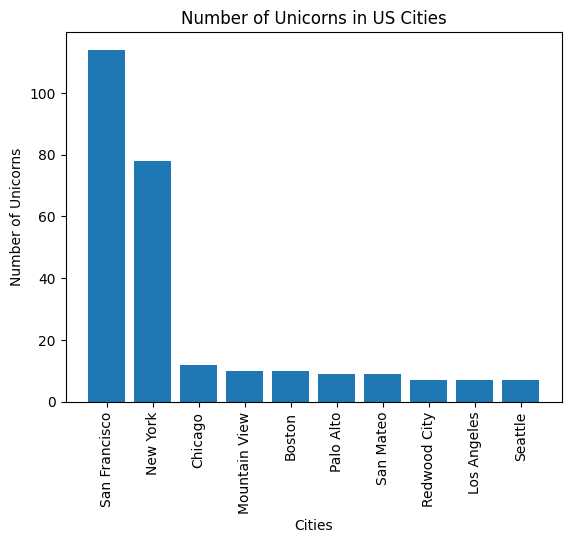

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a bar chart
plt.bar(df['city'], df['num_unicorn'])

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns in US Cities')

# Show the plot
plt.show()

From the results we see that San Francisco has the most companies that became a unicorn between the years 2019-2021. Following SF is New York which has 36 less unicorn companies in the same time. Lastly, Chicago comes in in third place with 12 companies, 66 less the NY. We can also see that 60% (6/10) of the top 10 cities with the most unicorn companies are coming from the state of California.

## Industries with most Unicorns

In [9]:
SELECT i.industry, COUNT(i.*) AS num_unicorn
FROM industries i
JOIN dates d
    ON i.company_id = d.company_id
JOIN companies c	
	ON d.company_id = c.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
AND c.country = 'United States'
GROUP BY i.industry
ORDER BY num_unicorn DESC;

,industry,num_unicorn
0,Internet software & services,113
1,Fintech,91
2,Health,37
3,Artificial intelligence,31
4,Cybersecurity,29
5,Data management & analytics,27
6,Other,23
7,E-commerce & direct-to-consumer,23
8,"Supply chain, logistics, & delivery",14
9,Mobile & telecommunications,7


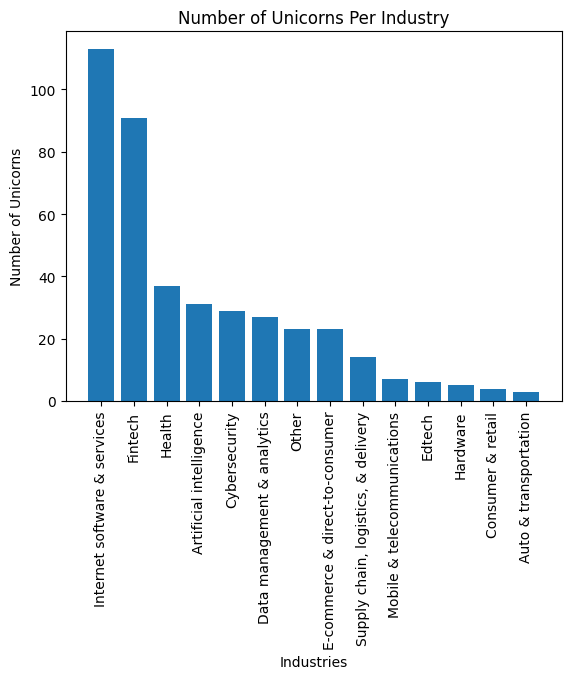

In [10]:
# Create a bar chart
plt.bar(df1['industry'], df1['num_unicorn'])

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Industries')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns Per Industry')

# Show the plot
plt.show()

The industry with the most unicorns in the US between 2019-2021 is internet software & services with 113 companies. This is followed by the financial technology industry that has 91 unicorn companies and Health with 37.

## Industries with Highest Average Funding

In [11]:
SELECT i.industry, ROUND(AVG(f.funding/1000000), 0) AS average_funding_millions
FROM industries i
JOIN dates d
    ON i.company_id = d.company_id
JOIN funding f	
	ON d.company_id = f.company_id
JOIN companies c	
	ON f.company_id = c.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
AND c.country = 'United States'
GROUP BY i.industry
ORDER BY average_funding_millions DESC;

,industry,average_funding_millions
0,Auto & transportation,1035
1,Consumer & retail,742
2,Edtech,593
3,Other,539
4,E-commerce & direct-to-consumer,534
5,Artificial intelligence,497
6,Data management & analytics,464
7,Cybersecurity,453
8,Mobile & telecommunications,426
9,Fintech,415


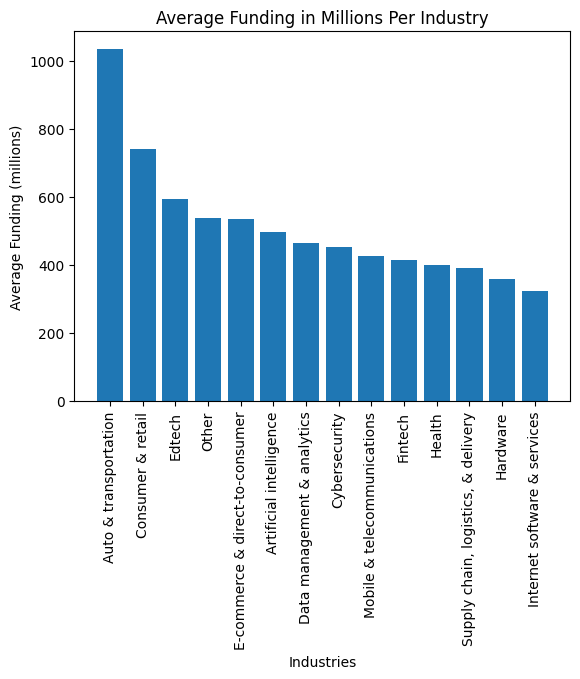

In [12]:
# Create a bar chart
plt.bar(df2['industry'], df2['average_funding_millions'])

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Industries')
plt.ylabel('Average Funding (millions)')
plt.title('Average Funding in Millions Per Industry')

# Show the plot
plt.show()

The results shows that the auto & transportation industry is recieving the most funding on average at just over one billion dollars. Its followed by the consumer & retail businesses then education technology.

## Industries with Highest Average Valuation

In [15]:
SELECT i.industry, ROUND(AVG(f.valuation/1000000000), 2) AS average_valuation_billions
FROM industries i
JOIN dates d
    ON i.company_id = d.company_id
JOIN funding f	
	ON d.company_id = f.company_id
JOIN companies c	
	ON f.company_id = c.company_id
WHERE EXTRACT(year FROM d.date_joined) in ('2019', '2020', '2021')
AND c.country = 'United States'
GROUP BY i.industry
ORDER BY average_valuation_billions DESC;

,industry,average_valuation_billions
0,Auto & transportation,4.33
1,Data management & analytics,3.67
2,E-commerce & direct-to-consumer,3.09
3,Fintech,3.05
4,Artificial intelligence,3.00
5,Consumer & retail,3.00
6,Internet software & services,2.72
7,Mobile & telecommunications,2.71
8,Edtech,2.67
9,Cybersecurity,2.48


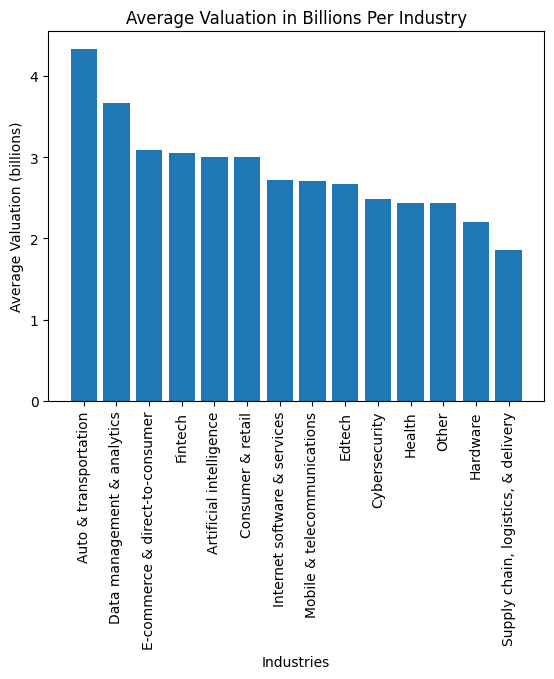

In [17]:
# Create a bar chart
plt.bar(df3['industry'], df3['average_valuation_billions'])

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Industries')
plt.ylabel('Average Valuation (billions)')
plt.title('Average Valuation in Billions Per Industry')

# Show the plot
plt.show()

And finally we are looking at with the highest average valuation. Once again, auto & transportation comes in at first place with an average of 4.33 billion dollars in valuation. This is followed by the data management & analytics industry that has about 3.67 billion dollar in average valuation. And then E-commerce & direct-to-consumer is in third place with around 3.09 billion dollars.

## Conclusion

To conlude this analysis, we've gained some insight into the unicorn market in the United States between the years 2019-2021. We can see from the first query that SF and NY are far ahead in number of unicorns to come up in those years. We also can see that the majority of cities in the top 10 are in California. Furthermore the internet & software service has quite the gap in number of unicorns that came up in this years. We've observed that auto & transportation is the most funded and highest valued industry on average. Overall, it's clear to see that the best performing industries are what might be considered tech industry, wether its software, auto, fintech or AI amongst others. In addition, most of the unicorn companies are headquarted in California. So if you're looking to invest in a potential unicorn companies, look into tech companies in California.